#**Machine Learning con Python**

###Laboratorio semana 2
---
###Preparado por:
##**Diego Fernando Quijano Girón.**
---
##Dataset empleado:
población_2010_2022 es la informacion acerca de la ploblabación de cada municipio de Colombia
[Link del dataset](https://www.kaggle.com/datasets/julianusugaortiz/colombia-poblation-20102022-municipalities)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split #Permite hacer una division de datos de entrenamiento de datos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#**Paso 2:**

###Proceso para cargar archivos CSV a pandas.



In [2]:
dataset = 'poblacion_2010_2022.csv'
df = pd.read_csv(dataset, encoding= 'utf-16')
data=df.values
df.head(10)

,DP,DPNOM,COD_MUNICIPIO,MPNOM,AÑO,Total
0,5,Antioquia,5001,Medellín,2010,2185539
1,5,Antioquia,5001,Medellín,2011,2213549
2,5,Antioquia,5001,Medellín,2012,2240690
3,5,Antioquia,5001,Medellín,2013,2266969
4,5,Antioquia,5001,Medellín,2014,2293601
5,5,Antioquia,5001,Medellín,2015,2320791
6,5,Antioquia,5001,Medellín,2016,2351077
7,5,Antioquia,5001,Medellín,2017,2385018
8,5,Antioquia,5002,Abejorral,2010,21822
9,5,Antioquia,5002,Abejorral,2011,21619


##Adecuar los datos del DataFrame.

In [3]:
df.columns

Index(['DP', 'DPNOM', 'COD_MUNICIPIO', 'MPNOM', 'AÑO', 'Total'], dtype='object')

In [4]:
df.columns = ['cod_dpt', 'dpt_nomb', 'cod_muni', 'muni_nomb', 'anio', 'total']
df.columns

Index(['cod_dpt', 'dpt_nomb', 'cod_muni', 'muni_nomb', 'anio', 'total'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14586 entries, 0 to 14585
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cod_dpt    14586 non-null  int64 
 1   dpt_nomb   14586 non-null  object
 2   cod_muni   14586 non-null  int64 
 3   muni_nomb  14586 non-null  object
 4   anio       14586 non-null  int64 
 5   total      14586 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 683.8+ KB


In [6]:
df['dpt_nomb'] = df['dpt_nomb'].apply(lambda x: x.replace('Nariño', 'Narino'));
df['dpt_nomb'] = df['dpt_nomb'].apply(lambda x: x.lower());
df['muni_nomb'] = df['muni_nomb'].apply(lambda x: x.lower());
df['anio'] = df['anio'].astype('int64');
df['cod_dpt'] = df['cod_dpt'].astype('int64');
df['cod_muni'] = df['cod_muni'].astype('category');

df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14586 entries, 0 to 14585
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   cod_dpt    14586 non-null  int64   
 1   dpt_nomb   14586 non-null  object  
 2   cod_muni   14586 non-null  category
 3   muni_nomb  14586 non-null  object  
 4   anio       14586 non-null  int64   
 5   total      14586 non-null  int64   
dtypes: category(1), int64(3), object(2)
memory usage: 639.4+ KB


In [7]:
df.head(20)

,cod_dpt,dpt_nomb,cod_muni,muni_nomb,anio,total
0,5,antioquia,5001,medellín,2010,2185539
1,5,antioquia,5001,medellín,2011,2213549
2,5,antioquia,5001,medellín,2012,2240690
3,5,antioquia,5001,medellín,2013,2266969
4,5,antioquia,5001,medellín,2014,2293601
5,5,antioquia,5001,medellín,2015,2320791
6,5,antioquia,5001,medellín,2016,2351077
7,5,antioquia,5001,medellín,2017,2385018
8,5,antioquia,5002,abejorral,2010,21822
9,5,antioquia,5002,abejorral,2011,21619


In [8]:
df.shape

(14586, 6)

In [9]:
df.describe()

,cod_dpt,anio,total
count,14586.000000,14586.000000,1.458600e+04
mean,38.282531,2016.000000,4.224537e+04
std,26.577331,3.741786,2.527289e+05
min,5.000000,2010.000000,0.000000e+00
25%,15.000000,2013.000000,6.515500e+03
50%,25.000000,2016.000000,1.260450e+04
75%,66.000000,2019.000000,2.629125e+04
max,99.000000,2022.000000,7.901653e+06


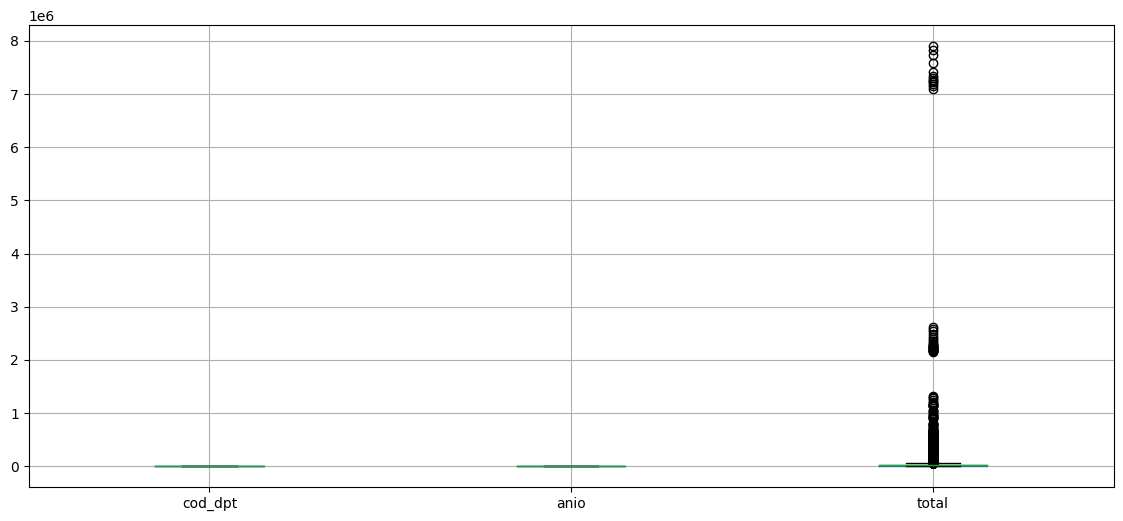

In [10]:
df.boxplot(vert=True, figsize=(14,6));
plt.rc('figure',
       figsize = ( 14,6));

##Se deben analizar los outliers para determinar cuales son los valores que estan presentando estos comportamientos.    

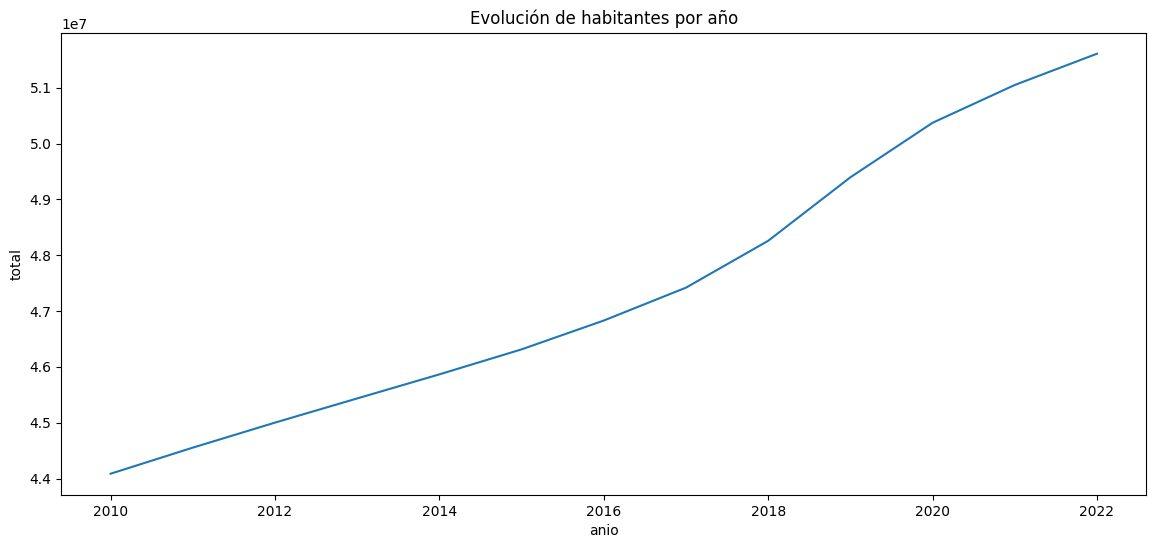

In [11]:
anios = df['anio'].unique();
valores = df.groupby('anio')['total'].sum();
plt.plot(anios, valores);
plt.xlabel('anio')
plt.ylabel('total')
plt.title('Evolución de habitantes por año')

plt.show()

##En este análisis se puede evidenciar que al transcurrir los años la tendencia es que el número de habitantes se incremente   

##El resultado de este grafico comprende cada uno de los departamentos con sus codigos de municipio aunque no resulto con los valores unico de los codigos sino que los sumo  

In [12]:
cant_municipios=df.groupby('dpt_nomb')['muni_nomb'].nunique().reset_index()
fig = px.bar(cant_municipios, x= 'dpt_nomb', y='muni_nomb', title= 'Cantidad de municipios por departamento')
fig.show()

In [13]:
habitantes_2022 = df[df['anio'] == 2022];
fig = px.histogram(habitantes_2022, x= 'dpt_nomb', y='total', title= 'Cantidad de habitantes por departamento en el año 2022 ');
fig.show();


##Con el resultado del histograma se detalla cuantos habitantes hay por cada departamento en el año 2022.


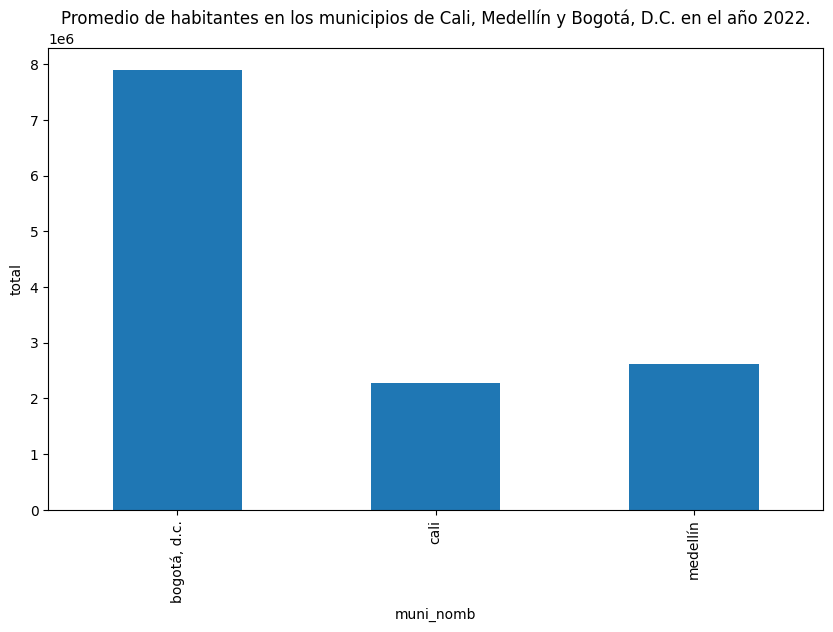

In [14]:
mun_ca_bo_me = ['cali', 'medellín', 'bogotá, d.c.'];
filtro_mun_anio = df[(df['anio'] == 2022) & (df['muni_nomb'].isin(mun_ca_bo_me))];
prom_habitantes = filtro_mun_anio.groupby('muni_nomb')['total'].mean();

plt.figure(figsize=(10,6));
prom_habitantes.plot(kind='bar')
plt.xlabel('muni_nomb');
plt.ylabel('total');
plt.title('Promedio de habitantes en los municipios de Cali, Medellín y Bogotá, D.C. en el año 2022.');
plt.show()

##Este es el promedio de habitantes en los municipios de Cali, Medellín y Bogotá, D.C. en el año 2022, afirmando que Bogotá como ciudad capital y mas grande que las otras 2 se ubica en primer lugar con mas habitantes.

#**Laboratiorio semana 3**
-----
##Predicción de valores aproximados con regresión lineal

In [15]:
df.head(10)

,cod_dpt,dpt_nomb,cod_muni,muni_nomb,anio,total
0,5,antioquia,5001,medellín,2010,2185539
1,5,antioquia,5001,medellín,2011,2213549
2,5,antioquia,5001,medellín,2012,2240690
3,5,antioquia,5001,medellín,2013,2266969
4,5,antioquia,5001,medellín,2014,2293601
5,5,antioquia,5001,medellín,2015,2320791
6,5,antioquia,5001,medellín,2016,2351077
7,5,antioquia,5001,medellín,2017,2385018
8,5,antioquia,5002,abejorral,2010,21822
9,5,antioquia,5002,abejorral,2011,21619


## Paso 1: Cargar dataset



In [16]:
pd.DataFrame(df, columns = ['dpt_nomb','muni_nomb','cod_dpt','cod_muni','anio','total'])

,dpt_nomb,muni_nomb,cod_dpt,cod_muni,anio,total
0,antioquia,medellín,5,5001,2010,2185539
1,antioquia,medellín,5,5001,2011,2213549
2,antioquia,medellín,5,5001,2012,2240690
3,antioquia,medellín,5,5001,2013,2266969
4,antioquia,medellín,5,5001,2014,2293601
...,...,...,...,...,...,...
14581,vichada,cumaribo,99,99773,2018,72691
14582,vichada,cumaribo,99,99773,2019,76196
14583,vichada,cumaribo,99,99773,2020,78863
14584,vichada,cumaribo,99,99773,2021,79984


In [17]:
#Cargando DataFrame
dataset = 'poblacion_2010_2022.csv'
dataf = pd.read_csv(dataset, encoding= 'utf-16')

In [18]:
#Eliminando colunas cualitativas
dataf = dataf.drop(columns=['DPNOM', 'MPNOM'])
data = dataf.values
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14586 entries, 0 to 14585
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   DP             14586 non-null  int64
 1   COD_MUNICIPIO  14586 non-null  int64
 2   AÑO            14586 non-null  int64
 3   Total          14586 non-null  int64
dtypes: int64(4)
memory usage: 455.9 KB


In [19]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,cod_dpt,anio,total
cod_dpt,1.000000e+00,-7.677251e-13,-0.029757
anio,-7.677251e-13,1.000000e+00,0.008474
total,-2.975736e-02,8.473892e-03,1.000000


<ipython-input-20-81c134179480>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



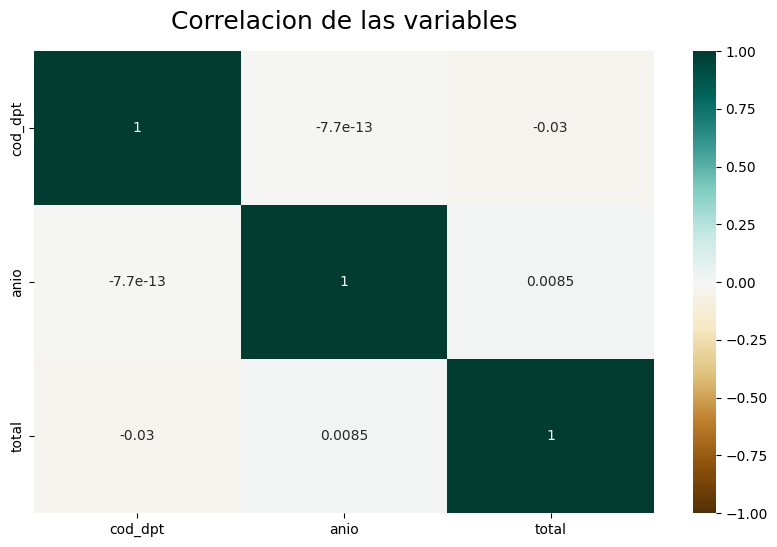

In [20]:
# Creacion mapa de calor
import seaborn as sns
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlacion de las variables', fontdict={'fontsize': 18}, pad=16);

In [21]:
data=dataf.values
x=data[:,:-1] #Columnas de Entradas || Son las caracteristicas de la poblacion
y=data[:,-1]  #Columnas de salida 'Outputs'
n, d = x.shape #Dimension de nuestro dataset

##Paso 2: Creación modelo de predicción.




In [22]:
from scipy.optimize import LinearConstraint
#Dividir Training / Testing
porc_test = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = porc_test)
print('\t %d datos para training' %x_train.shape[0])
print('\t %d datos para testing' %x_test.shape[0])
#Creacion del objeto modelo
modelo = LinearRegression()

	 11668 datos para training
	 2918 datos para testing


## **Paso 3:** Entrenamiento del modelo

In [23]:
#Entrenar el modelo
modelo.fit(x_train, y_train)
coef = modelo.coef_
print(coef)

[109070.36923379   -109.34037642   1455.36781612]


##**Paso 4:** Validacion del modelo

In [24]:
#Realizar la prediccion
y_train_predict = modelo.predict(x_train) #Con los datos de entrenamiento
y_test_predict = modelo.predict(x_test) #Con los datos de prueba

# Evaluar los scores
error_train = mean_squared_error(y_train_predict, y_train)
print('Error en training: %s' % round(error_train,2))
error_test = mean_squared_error(y_test_predict, y_test)
print('Error en testing: %s' % round(error_test, 2))

Error en training: 53763954547.17
Error en testing: 99264321380.3


##**Paso 5:** Utilizar modelo



In [25]:
# Evaluar los habitantes del año 2023
v = np.array([5, 5021,  2019])
pred = modelo.predict(v.reshape(1, -1))
print('\n Para el año 2023 el número de habitantes es de: ', str(round(pred[0],0)))


 Para el año 2023 el número de habitantes es de:  99411.0


In [26]:
df.head(10)

,cod_dpt,dpt_nomb,cod_muni,muni_nomb,anio,total
0,5,antioquia,5001,medellín,2010,2185539
1,5,antioquia,5001,medellín,2011,2213549
2,5,antioquia,5001,medellín,2012,2240690
3,5,antioquia,5001,medellín,2013,2266969
4,5,antioquia,5001,medellín,2014,2293601
5,5,antioquia,5001,medellín,2015,2320791
6,5,antioquia,5001,medellín,2016,2351077
7,5,antioquia,5001,medellín,2017,2385018
8,5,antioquia,5002,abejorral,2010,21822
9,5,antioquia,5002,abejorral,2011,21619


##Cruzando DataFrames

In [27]:
pib__name = 'PIB-anual-dpto.xlsx'
datf = pd.read_excel(pib__name)
datf.head()

,Código Departamento (DIVIPOLA),DEPARTAMENTOS,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020p,2021p,2022pr
0,NaN,COLOMBIA,1.234080e+07,1.389395e+07,1.481075e+07,1.571682e+07,1.663330e+07,1.737474e+07,1.844501e+07,1.941136e+07,2.046875e+07,2.146074e+07,1.979346e+07,2.333034e+07,2.829811e+07
1,91.0,Amazonas,5.591516e+06,5.969210e+06,6.370295e+06,6.803987e+06,7.465703e+06,8.186030e+06,8.952717e+06,9.455515e+06,9.912411e+06,1.039417e+07,9.576252e+06,1.074842e+07,1.275966e+07
2,5.0,Antioquia,1.309996e+07,1.458091e+07,1.555245e+07,1.642566e+07,1.760712e+07,1.881779e+07,2.028905e+07,2.102142e+07,2.211297e+07,2.344345e+07,2.229315e+07,2.643930e+07,3.130816e+07
3,81.0,Arauca,2.282895e+07,2.678897e+07,2.575594e+07,2.419309e+07,2.114478e+07,1.891002e+07,1.699999e+07,1.743205e+07,1.941900e+07,2.005973e+07,1.741010e+07,2.186580e+07,2.778718e+07
4,8.0,Atlántico,9.481200e+06,1.028831e+07,1.142154e+07,1.243411e+07,1.368147e+07,1.492185e+07,1.589394e+07,1.655903e+07,1.710455e+07,1.765432e+07,1.660275e+07,1.932175e+07,2.297864e+07
